# Proposal: Wine Type and Acidity Data Set

### Introduction:
In our project, we will be working with red and white wine samples collected from the north of Portugal. Our variables result from physicochemical tests that were conducted to evaluate wine quality. To be specific, our research question is what is the wine type based on its chemical components. We will be using a custom dataset that merges the winequality-red and winequality-white datasets found on the UCI Machine Learning Repository.

In [1]:
library(tidymodels)
library(tidyverse)
library(plyr)
library(dplyr)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ recipes      1.0.1
✔ dials        1.0.0     ✔ rsample      1.0.0
✔ dplyr        1.0.9     ✔ tibble       3.1.7
✔ ggplot2      3.3.6     ✔ tidyr        1.2.0
✔ infer        1.0.2     ✔ tune         1.0.0
✔ modeldata    1.0.0     ✔ workflows    1.0.0
✔ parsnip      1.0.0     ✔ workflowsets 1.0.0
✔ purrr        0.3.4     ✔ yardstick    1.0.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ forcats 0.5.1
✔ stringr 1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks sc

In [2]:
download.file("https://raw.githubusercontent.com/RegalSword/DSCI-Group-123-Project/main/winequality-red.csv", 
              destfile = "winequality-red.csv") 

download.file("https://raw.githubusercontent.com/RegalSword/DSCI-Group-123-Project/main/winequality-white.csv",
              destfile = "winequality-white.csv") 

redwine_df <- read_delim(file = "winequality-red.csv", delim = ";") %>%
         cbind(wine_type = "Red") # adding column to distinguish red wine and its components

whitewine_df <- read_delim(file = "winequality-white.csv", delim = ";") %>%
         cbind(wine_type = "White") # adding column to distinguish white wine and its components

wine_df <- rbind(redwine_df, whitewine_df) %>%  # combining red and white wine data
         rename(c("fixed acidity" = "fixed_acid", # changing column names to make it easier for selecting and cleaing data
                  "volatile acidity" = "volatile_acid",
                  "citric acid" = "citric_acid",
                  "total sulfur dioxide" = "total_SO2"))

head(wine_df) # Demonstrates that the dataset can be read from the web into R

wine_split <- initial_split(wine_df, prop = 0.80, wine_type = Class)
wine_train <- training(wine_split)  # training dataframe
wine_test <- testing(wine_split)  # testing dataframe

glimpse(wine_train)
glimpse(wine_test)

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,fixed_acid,volatile_acid,citric_acid,residual sugar,chlorides,free sulfur dioxide,total_SO2,density,pH,sulphates,alcohol,quality,wine_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red


Rows: 5,197
Columns: 13
$ fixed_acid            <dbl> 9.9, 7.2, 5.8, 6.8, 7.2, 7.6, 6.8, 7.5, 7.9, 6.3…
$ volatile_acid         <dbl> 0.500, 0.260, 0.240, 0.360, 0.230, 0.270, 0.340,…
$ citric_acid           <dbl> 0.50, 0.44, 0.39, 0.32, 0.38, 0.32, 0.27, 0.24, …
$ `residual sugar`      <dbl> 13.8, 7.1, 1.5, 1.8, 14.3, 1.2, 5.2, 4.6, 8.5, 1…
$ chlorides             <dbl> 0.205, 0.027, 0.054, 0.067, 0.058, 0.043, 0.060,…
$ `free sulfur dioxide` <dbl> 48, 25, 37, 4, 55, 23, 14, 8, 20, 60, 23, 35, 5,…
$ total_SO2             <dbl> 82, 126, 158, 8, 194, 72, 169, 134, 112, 143, 17…
$ density               <dbl> 1.00242, 0.99300, 0.99320, 0.99280, 0.99790, 0.9…
$ pH                    <dbl> 3.16, 3.02, 3.21, 3.36, 3.09, 3.06, 3.27, 3.14, …
$ sulphates             <dbl> 0.75, 0.34, 0.52, 0.55, 0.44, 0.68, 0.57, 0.50, …
$ alcohol               <dbl> 8.8, 11.1, 9.3, 12.8, 9.0, 10.5, 11.6, 9.1, 11.7…
$ quality               <dbl> 5, 8, 6, 7, 6, 5, 6, 3, 6, 6, 7, 5, 5, 6, 3, 7, …
$ wine_type     

### Preliminary exploratory data analysis:

In [3]:
wine_variables <- select(wine_train,
                         fixed_acid,
                         volatile_acid,
                         citric_acid,
                         total_SO2,
                         sulphates,
                         wine_type) %>%
                  mutate(wine_type = as_factor(wine_type))

head(wine_variables) # Clean data in a tidy format using only training data

wine_variables %>% 
    pull(wine_type) %>%
    levels() # Outputs total number of categories (dependent variables)

# Exploratory data analysis:
wine_summary <- nrow(wine_variables) 
        wine_variables %>%
        group_by(wine_type) %>%
        dplyr::summarize(count = n(), # Total number of observations in each class 
                         wine_proportion = n() / wine_summary * 100, # The percentage of each class indicating the proportion relative to the dataset
                         mean_fixed_acid = mean(fixed_acid), # Means of fixed acidity in each class
                         mean_volatile_acid = mean(volatile_acid), # Means of volatile acidity in each class
                         mean_citric_acid = mean(citric_acid), # Means of citric acid in each class
                         mean_total_SO2 = mean(total_SO2), # Means of total sulfure dioxide in each class
                         mean_sulphates = mean(sulphates)) # Means of sulfates in each class

,fixed_acid,volatile_acid,citric_acid,total_SO2,sulphates,wine_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1475,9.9,0.50,0.50,82,0.75,Red
2818,7.2,0.26,0.44,126,0.34,White
1854,5.8,0.24,0.39,158,0.52,White
1006,6.8,0.36,0.32,8,0.55,Red
1836,7.2,0.23,0.38,194,0.44,White
5786,7.6,0.27,0.32,72,0.68,White


[1] "Red"   "White"

wine_type,count,wine_proportion,mean_fixed_acid,mean_volatile_acid,mean_citric_acid,mean_total_SO2,mean_sulphates
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Red,1257,24.18703,8.327685,0.5270525,0.2723309,46.23707,0.6612172
White,3940,75.81297,6.856916,0.2789518,0.3338883,138.18401,0.4905051


### Methods:
- We will conduct our data analysis using the k-nearest neighbours classification method. We will be using the fixed acidity and volatile acidity columns to predict what the wine type is.
- To represent our results, we will use a scatter plot with volatile acidity on the y axis and fixed acidity on the x axis, along with colour to differentiate between the two types of wine to visualise the relationship between the fixed acidity and volatile acidity variables. 

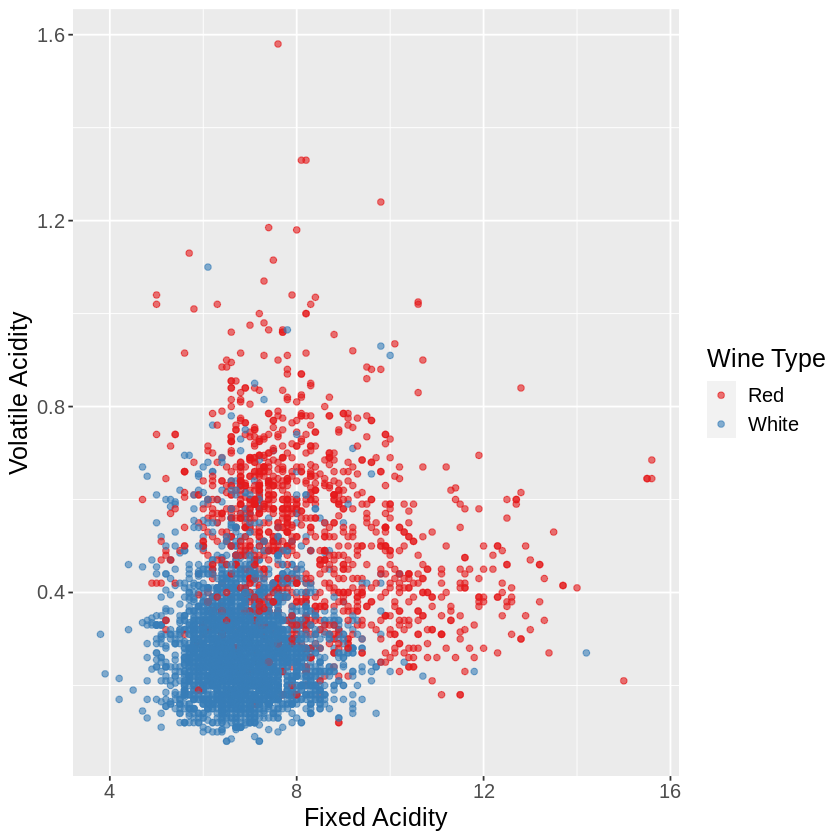

In [4]:
fixed_volatile <- wine_variables %>%
            ggplot(aes(x = fixed_acid, 
                       y = volatile_acid,
                       color = wine_type)) +
            geom_point(alpha = 0.6) +
            labs(x = "Fixed Acidity", 
                 y = "Volatile Acidity",
                 color = "Wine Type") +
            theme(text = element_text(size = 15)) +
            scale_color_brewer(palette = "Set1")

fixed_volatile # Scatter plot to visualize the relationship between the fixed acidity and volatile acidity variables.

### Expected outcomes and significance:
- We expect to predict whether white or red wine is better for our health based on acidity. 
- These findings could be useful for nutritionists as it will help them in determining what type of wine is healthier. In this case the difference in fixed and volatile acidity between different types of wine is being used to compare the health implications. 
- In terms of further questions, we can perform a similar analysis on other types of wine to identify trends in fixed and volatile acidity or we can also compare the chlorides and sulphate content in each wine.
